In [2]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
input = pd.read_csv('data-onlinePCA.txt', sep=',')
data = np.copy(input.ix[:, 1:3])
data[0:3, :]

array([[-0.00973418,  0.22449331],
       [ 0.04644704,  1.57767475],
       [-0.09561311, -0.44307315]])

In [49]:
weight = np.array([[0.0, 0.0] for i in range(len(data))])
weight[0] = [1.0, 1.0]
for i in range(len(data)):
    if i != 0:
        weight[i] = np.dot(weight[i-1].T, data[i-1])
        weight[i] = np.dot(weight[i], data[i-1])
        weight[i] = weight[i-1] + 0.002 * weight[i]
weight.shape

(2000, 2)

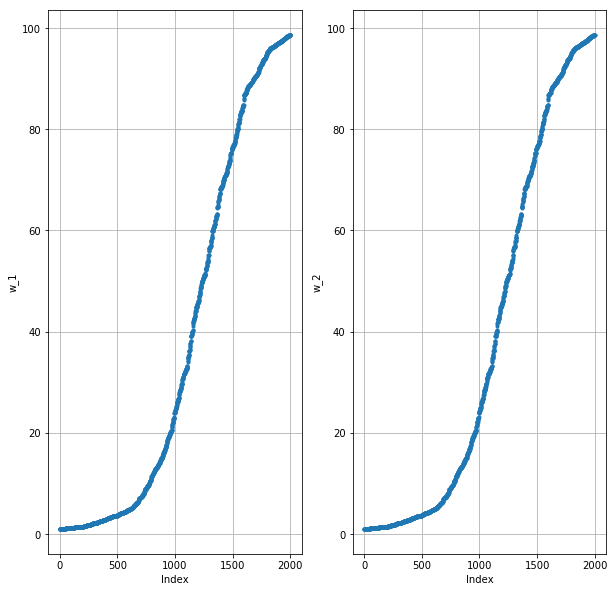

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(weight[:, i], '.')
    plt.ylabel('w_{}'.format(i+1))
    plt.grid()
    plt.xlabel('Index')